In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [30]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

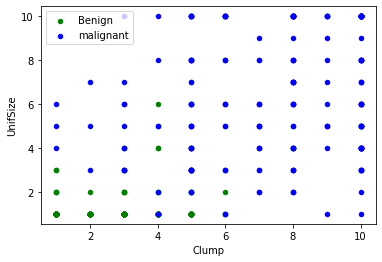

In [31]:
benign_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]

axes = benign_df.plot(kind='scatter' , x='Clump' , y='UnifSize', color='green', label='Benign')
malignant_df.plot(kind='scatter' , x='Clump' , y='UnifSize', color='blue', label='malignant', ax =axes)

#help (benign_df.plot) > untuk membaca parameter

In [32]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [34]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc']= cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [37]:
cell_df.columns
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#cell_df 100 baris dan 11 kolom
#dipilih 9 baris dari 11 kolom

#independent variable
x = np.asarray(feature_df)

#dependent variable
y = np.asarray(cell_df['Class'])

x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=4)

x_train.shape      #(546, 9)
x_test.shape       #(137, 9)
y_train.shape      #(546, 1)
y_test.shape       #(137, 1)

(546,)

Modelling SVM, ada beberapa algoritma dari kernel untuk performa saat prossessing,  basic nya mapping data ke dimensi yang tinggi itu disebut kerneling, ada beberapa yaitu 
1. linear
2. polynomial
3. radial basis function (RBF)
4. sigmoid

In [56]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)       # auto (1/n_features)
                                                               #C=2 impuls data point yang salah tempatnya, hyperplane

classifier.fit(x_train, y_train)

y_predict = classifier.predict(x_test)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



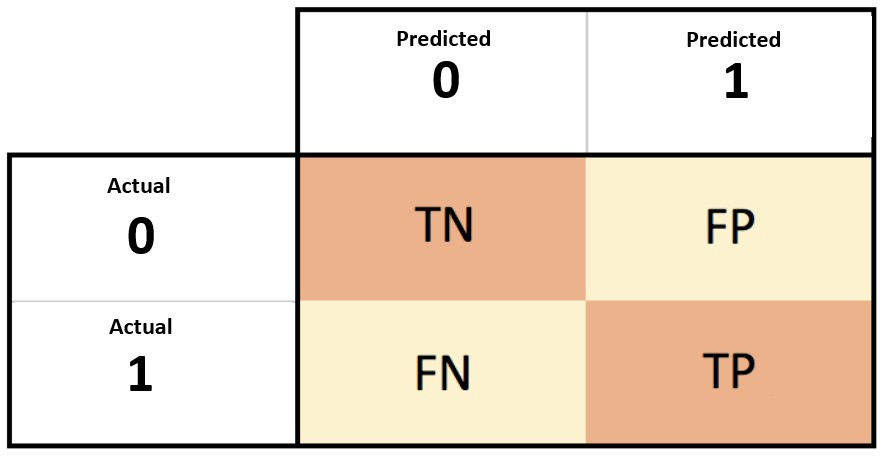